In [1]:
!rm -r WalkRNN

In [2]:
!git clone https://github.com/dtylor/WalkRNN.git

Cloning into 'WalkRNN'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 474 (delta 7), reused 17 (delta 4), pack-reused 452
Receiving objects: 100% (474/474), 9.86 MiB | 0 bytes/s, done.
Resolving deltas: 100% (254/254), done.
Checking connectivity... done.


In [3]:
%cd WalkRNN
!ls

/notebooks/WalkRNN
Demonstration.ipynb    MUTAG.ipynb	 README.md    examples	 n2v
LICENSE-3RD-PARTY.txt  Motivation.ipynb  TODO	      graphwave  test.py
LICENSE.md	       OrgChart.ipynb	 __init__.py  module.py  utilities.py


In [4]:
!conda install fastai  -c fastai -c pytorch --yes


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.12
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [5]:
import fastai
import pandas as pd

In [6]:
from fastai.utils.show_install import *
show_install()



```text
=== Software === 
python        : 3.6.7
fastai        : 1.0.58
fastprogress  : 0.1.21
torch         : 1.0.0
nvidia driver : 418.67
torch cuda    : 9.0.176 / is available
torch cudnn   : 7401 / is enabled

=== Hardware === 
nvidia gpus   : 1
torch devices : 1
  - gpu0      : 8126MB | Quadro M4000

=== Environment === 
platform      : Linux-4.4.0-130-generic-x86_64-with-debian-stretch-sid
distro        : #156-Ubuntu SMP Thu Jun 14 08:53:28 UTC 2018
conda env     : fastai
python        : /opt/conda/envs/fastai/bin/python
sys.path      : /opt/conda/envs/fastai/lib/python36.zip
/opt/conda/envs/fastai/lib/python3.6
/opt/conda/envs/fastai/lib/python3.6/lib-dynload

/opt/conda/envs/fastai/lib/python3.6/site-packages
/opt/conda/envs/fastai/lib/python3.6/site-packages/IPython/extensions
/root/.ipython
```

Please make sure to include opening/closing ``` when you paste into forums/github to make the reports appear formatted as code sections.

Optional package(s) to enhance the diagnosti

In [7]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /opt/conda/envs/fastai/lib/python3.6/site-packages (0.21.3)


In [8]:
!pip install networkx

In [9]:
!pip install seaborn

In [10]:
from utilities import load_graph_kernel_graph, load_graph_kernel_labels, transform_graph


Gkern = load_graph_kernel_graph("./examples/data/DD")
y = load_graph_kernel_labels("./examples/data/DD")


DONE


In [11]:
import random, networkx as nx
components = set(nx.get_node_attributes(Gkern,'component').values())
comp_sm = random.sample(list(components),500)
nodes_small =[x for comp in comp_sm for x,y in Gkern.nodes(data=True) if y['component']==comp] 
print(len(nodes_small))
Gsm = Gkern.subgraph(nodes_small)

143973


In [12]:
#Transform networkx property graph into a format prepared for WalkRNN
G, current_vocab_size = transform_graph(Gsm, params={'num_kmeans_clusters': 4, "num_pca_components": 5, "num_batch":10, 'num_att_kmeans_clusters': 10})

finished graphwave_alg batches


In [13]:
import matplotlib.pyplot as plt
import networkx as nx
# create number for each group to allow use of colormap
from itertools import count


def plotGW(tmpG, comp_no):
 # get unique groups
 groups = set(nx.get_node_attributes(tmpG,'structure').values())

 mapping = dict(zip(sorted(groups),count()))
  
 comp_nodes = [x for x,y in tmpG.nodes(data=True) if y['component']==comp_no]
 print(len(comp_nodes))
 subgraph = tmpG.subgraph(comp_nodes)
 nodes = subgraph.nodes()
 colors = [mapping[subgraph.node[n]['structure']] for n in nodes]

 # drawing nodes and edges separately so we can capture collection for colobar
 pos = nx.spring_layout(subgraph)
 ec = nx.draw_networkx_edges(subgraph, pos, with_labels=True,alpha=0.2)
 nc = nx.draw_networkx_nodes(subgraph, pos, nodelist=nodes, node_color=colors, 
                            with_labels=True, node_size=100, cmap=plt.cm.jet, vmin=0,vmax=5)
 plt.colorbar(nc)
 plt.axis('off')
 plt.show()
 print(nx.get_node_attributes(subgraph,'structure'))
 

140


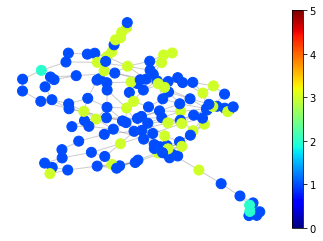

{289962: 1, 289963: 2, 289964: 1, 289965: 1, 289966: 2, 289967: 1, 289968: 2, 289969: 1, 289970: 1, 289971: 1, 289972: 1, 289973: 3, 289974: 1, 289975: 3, 289976: 1, 289977: 1, 289978: 1, 289979: 1, 289980: 1, 289981: 1, 289982: 1, 289983: 1, 289984: 1, 289985: 3, 289986: 1, 289987: 3, 289988: 1, 289989: 1, 289990: 3, 289991: 1, 289992: 1, 289993: 3, 289994: 1, 289995: 1, 289996: 3, 289997: 1, 289998: 3, 289999: 1, 290000: 1, 290001: 1, 290002: 1, 290003: 1, 290004: 1, 290005: 1, 290006: 1, 290007: 1, 290008: 1, 290009: 3, 290010: 1, 290011: 1, 290012: 1, 290013: 1, 290014: 3, 290015: 1, 290016: 1, 290017: 3, 290018: 1, 290019: 1, 290020: 1, 290021: 3, 290022: 1, 290023: 3, 290024: 3, 290025: 1, 290026: 3, 290027: 1, 290028: 1, 290029: 1, 290030: 1, 290031: 1, 290032: 1, 290033: 1, 290034: 1, 290035: 1, 290036: 1, 290037: 1, 290038: 2, 290039: 1, 290040: 1, 290041: 3, 290042: 3, 290043: 3, 290044: 1, 290045: 3, 290046: 1, 290047: 1, 290048: 1, 290049: 3, 290050: 1, 290051: 1, 290052: 1

In [14]:
plotGW(G,comp_sm[1])

99


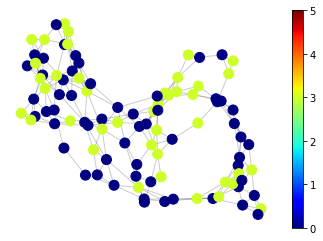

{136828: 3, 136829: 3, 136830: 0, 136831: 3, 136832: 0, 136833: 0, 136834: 3, 136835: 3, 136836: 0, 136837: 3, 136838: 0, 136839: 0, 136840: 0, 136841: 3, 136842: 3, 136843: 3, 136844: 3, 136845: 3, 136846: 3, 136847: 0, 136848: 0, 136849: 0, 136850: 3, 136851: 3, 136852: 3, 136853: 3, 136854: 3, 136855: 0, 136856: 0, 136857: 0, 136858: 0, 136859: 0, 136860: 0, 136861: 0, 136862: 0, 136863: 0, 136864: 0, 136865: 0, 136866: 3, 136867: 0, 136868: 0, 136869: 3, 136870: 3, 136871: 3, 136872: 0, 136873: 3, 136874: 0, 136875: 0, 136876: 0, 136877: 0, 136878: 0, 136879: 0, 136880: 3, 136881: 0, 136882: 0, 136883: 0, 136884: 3, 136885: 0, 136886: 3, 136887: 0, 136888: 0, 136889: 0, 136890: 0, 136891: 0, 136892: 0, 136893: 0, 136894: 3, 136895: 3, 136896: 0, 136897: 0, 136898: 3, 136899: 3, 136900: 0, 136901: 0, 136902: 3, 136903: 3, 136904: 3, 136905: 0, 136906: 0, 136907: 3, 136908: 0, 136909: 0, 136910: 0, 136911: 3, 136912: 0, 136913: 3, 136914: 0, 136915: 0, 136916: 0, 136917: 0, 136918: 3

In [15]:
plotGW(G,comp_sm[2])

183


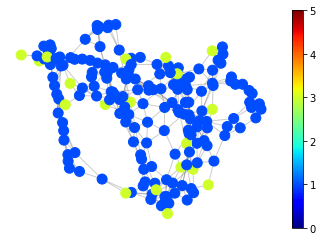

{322048: 1, 322049: 1, 322050: 1, 322051: 1, 322052: 3, 322053: 1, 322054: 3, 322055: 1, 322056: 1, 322057: 1, 322058: 1, 322059: 1, 322060: 1, 322061: 1, 322062: 1, 322063: 1, 322064: 1, 322065: 1, 322066: 1, 322067: 1, 322068: 1, 322069: 1, 322070: 1, 322071: 1, 322072: 1, 322073: 1, 322074: 1, 322075: 3, 322076: 1, 322077: 1, 322078: 1, 322079: 1, 322080: 1, 322081: 1, 322082: 1, 322083: 3, 322084: 1, 322085: 1, 322086: 1, 322087: 1, 322088: 3, 322089: 1, 322090: 1, 322091: 1, 322092: 1, 321910: 1, 321911: 1, 321912: 1, 321913: 1, 321914: 1, 321915: 1, 321916: 1, 321917: 3, 321918: 1, 321919: 1, 321920: 1, 321921: 3, 321922: 1, 321923: 1, 321924: 1, 321925: 1, 321926: 1, 321927: 1, 321928: 1, 321929: 1, 321930: 1, 321931: 1, 321932: 3, 321933: 1, 321934: 1, 321935: 1, 321936: 1, 321937: 1, 321938: 1, 321939: 1, 321940: 1, 321941: 1, 321942: 1, 321943: 1, 321944: 1, 321945: 1, 321946: 1, 321947: 1, 321948: 1, 321949: 1, 321950: 1, 321951: 1, 321952: 1, 321953: 1, 321954: 1, 321955: 1

In [16]:
plotGW(G,comp_sm[3])

447


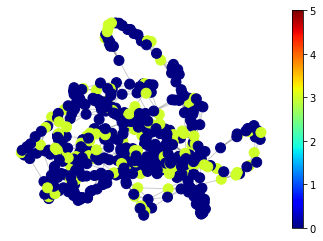

{22637: 0, 22638: 0, 22639: 0, 22640: 3, 22641: 0, 22642: 3, 22643: 0, 22644: 0, 22645: 0, 22646: 0, 22647: 0, 22648: 0, 22649: 0, 22650: 0, 22651: 0, 22652: 0, 22653: 3, 22654: 3, 22655: 3, 22656: 3, 22657: 3, 22658: 0, 22659: 0, 22660: 0, 22661: 0, 22662: 0, 22663: 3, 22664: 0, 22665: 0, 22666: 3, 22667: 0, 22668: 3, 22669: 0, 22670: 0, 22671: 0, 22672: 0, 22673: 3, 22674: 0, 22675: 3, 22676: 0, 22677: 0, 22678: 0, 22679: 3, 22680: 0, 22681: 0, 22682: 3, 22683: 3, 22684: 3, 22685: 3, 22686: 0, 22687: 3, 22688: 3, 22689: 0, 22690: 3, 22691: 0, 22692: 0, 22693: 0, 22694: 3, 22695: 0, 22696: 0, 22697: 0, 22698: 0, 22699: 0, 22700: 0, 22701: 0, 22702: 0, 22703: 0, 22704: 0, 22705: 0, 22706: 0, 22707: 0, 22708: 0, 22709: 0, 22710: 3, 22711: 0, 22712: 0, 22713: 0, 22714: 3, 22715: 0, 22716: 0, 22717: 3, 22718: 0, 22719: 0, 22720: 0, 22721: 0, 22722: 0, 22723: 0, 22724: 3, 22725: 0, 22726: 0, 22727: 0, 22728: 0, 22729: 0, 22730: 0, 22731: 3, 22732: 0, 22733: 0, 22734: 0, 22735: 0, 22736: 0,

In [17]:
plotGW(G,comp_sm[101])

358


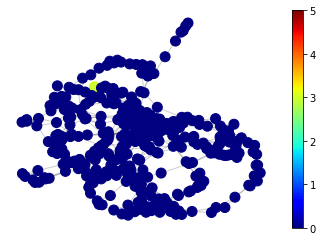

{109421: 0, 109422: 0, 109423: 0, 109424: 0, 109425: 0, 109426: 0, 109427: 0, 109428: 0, 109429: 0, 109430: 0, 109431: 0, 109432: 0, 109433: 0, 109434: 0, 109435: 0, 109436: 0, 109437: 0, 109438: 0, 109439: 0, 109440: 0, 109441: 0, 109442: 0, 109443: 3, 109444: 0, 109445: 0, 109446: 0, 109447: 0, 109448: 0, 109449: 0, 109450: 0, 109451: 0, 109452: 0, 109453: 0, 109454: 0, 109455: 0, 109456: 0, 109457: 0, 109458: 0, 109459: 0, 109460: 0, 109461: 0, 109462: 0, 109463: 0, 109464: 0, 109465: 0, 109466: 0, 109467: 0, 109468: 0, 109469: 0, 109470: 0, 109471: 0, 109472: 0, 109473: 0, 109474: 0, 109475: 0, 109476: 0, 109477: 0, 109478: 0, 109479: 0, 109480: 0, 109481: 0, 109482: 0, 109483: 0, 109484: 0, 109485: 0, 109486: 0, 109487: 0, 109488: 0, 109489: 0, 109490: 0, 109491: 0, 109492: 0, 109493: 0, 109494: 0, 109495: 0, 109496: 0, 109497: 0, 109498: 0, 109499: 0, 109500: 0, 109501: 0, 109502: 0, 109503: 0, 109504: 0, 109505: 0, 109506: 0, 109507: 0, 109508: 0, 109509: 0, 109510: 0, 109511: 0

In [18]:
plotGW(G,comp_sm[51])

In [19]:
G.nodes()[nodes_small[1]]

{'component': 446, 'structure': 3, 'label_0': 19}

In [20]:
from module import walk_as_string
walks = walk_as_string(G, componentLabels = y,params={'num_walks': 20, 'walk_length': 40})

Walk iteration:
('1', '/', '20')
('2', '/', '20')
('3', '/', '20')
('4', '/', '20')
('5', '/', '20')
('6', '/', '20')
('7', '/', '20')
('8', '/', '20')
('9', '/', '20')
('10', '/', '20')
('11', '/', '20')
('12', '/', '20')
('13', '/', '20')
('14', '/', '20')
('15', '/', '20')
('16', '/', '20')
('17', '/', '20')
('18', '/', '20')
('19', '/', '20')
('20', '/', '20')


/notebooks/WalkRNN/module.py:140: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  sorted_walks = pd.DataFrame(walks).sort_values(0).as_matrix()


[  1 267 268 252 172 170 172 170 172 173 245 200 185 200 196 197 200  13  17  14  17 138  17  20  25  22 123  25  23
  40  39  66 261  66  37  66  62  67  19  18]
[  1  30  27  28  29 273  29 273 272 273  29  28  27 325 273  29 325 273 325  27  28 325 273 272 273 272  29 325  27
  30  27  26  27  28  31  26  28  29 273 325]
[  1   3  74   7  90  91  93  91  94  80  81 163 164  87 164  87 164 163  72 244 242 260 268  31 260 269 191 189 188
 189 190 139 193 192 242 192 242 192 189 192]


In [21]:
from fastai.text import *
from sklearn.model_selection import train_test_split
import numpy


In [22]:
walks.head()

,walk,label,start_node,component
0,0 7 0 14 0 21 0 11 0 5 0 23 0 5 0 23 0...,1,1,1
1,0 7 0 19 0 4 0 18 0 19 0 11 0 19 0 11 ...,1,1,1
2,0 7 0 13 0 13 0 20 0 16 0 4 0 23 0 4 0...,1,1,1
3,0 7 0 21 0 6 0 23 0 11 0 6 0 7 0 19 0 ...,1,1,1
4,0 7 0 21 0 11 0 5 0 11 0 21 0 11 0 13 ...,1,1,1


In [23]:
walks.label.unique()

array([1, 2])

In [24]:
walks.shape

(2879460, 4)

In [25]:
from sklearn.model_selection import train_test_split
import numpy
data = list(set(walks.component))
x_traina ,x_test = train_test_split(data,test_size=0.1)    
x_train ,x_val = train_test_split(x_traina,test_size=0.2)  


In [26]:
train_tmp = pd.DataFrame(x_train)
train_tmp.columns = ['component']
df_train = pd.merge(walks, train_tmp, on='component', sort=False)
df_train.shape

(2099880, 4)

In [27]:
test_tmp = pd.DataFrame(x_test)
test_tmp.columns = ['component']
df_test = pd.merge(walks, test_tmp, on='component', sort=False)
df_test.shape

(280800, 4)

In [28]:
val_tmp = pd.DataFrame(x_val)
val_tmp.columns = ['component']
df_val = pd.merge(walks, val_tmp, on='component', sort=False)
df_val.shape

(498780, 4)

In [29]:
!mkdir result
mypath = './result'

In [30]:
data_lm = TextLMDataBunch.from_df(train_df=df_train[['walk', 'label']], valid_df=df_val[[
                                  'walk', 'label']],  path=mypath, text_cols='walk', label_cols='label')


In [31]:
data_lm.save('data_lm1.pkl')

In [32]:
!ls -l ./result

total 2292616
-rw-r--r-- 1 root root 2347637208 Oct  8 14:06 data_lm1.pkl


In [33]:
bs = 32
# load the data (can be used in the future as well to prevent reprocessing)
data_lm = load_data(mypath, 'data_lm1.pkl', bs=bs)

In [34]:
data_lm.show_batch() # take a look at the batch fed into the GPU

idx,text
0,10 0 16 0 9 0 21 0 20 0 21 xxbos 0 7 0 19 0 4 0 18 0 19 0 11 0 19 0 11 0 10 0 11 0 19 0 18 0 4 0 12 0 11 0 19 0 12 0 11 0 12 0 4 0 18 0 12 0 11 0 10 0 11 0 10 0 19 0 12 0 4
1,0 23 0 9 0 23 0 20 0 15 0 9 0 19 0 7 0 19 0 15 0 14 0 9 0 23 0 15 0 23 0 11 0 9 0 11 0 23 0 23 0 15 0 23 0 19 0 11 0 15 0 23 0 9 0 23 0 23 0 19 0 15 0 14 0 15 0 9 0 19
2,0 6 0 7 0 20 0 7 0 20 0 7 0 20 0 7 0 20 0 7 0 6 0 22 0 19 0 14 0 19 0 22 0 19 0 14 0 19 0 14 0 19 0 14 0 19 0 14 0 15 0 11 xxbos 0 14 0 19 0 14 0 15 0 11 0 16 0 18 0 15 0
3,3 5 3 19 3 11 0 13 3 23 3 5 0 7 3 13 0 6 3 23 3 4 3 23 0 7 3 23 0 13 3 11 xxbos 3 14 3 16 0 5 0 17 0 5 0 16 0 15 0 23 3 23 0 15 0 16 3 7 0 10 3 14 0 10 3 7 0 5 0 9 0
4,23 3 4 3 13 0 16 3 13 0 19 xxbos 3 21 3 10 0 9 0 14 3 10 3 10 0 13 3 10 3 6 3 7 0 14 3 6 3 10 3 7 0 13 0 9 3 10 3 10 3 21 0 13 3 15 3 23 0 11 3 15 0 11 0 10 3 14 0 13 3 14


In [35]:
awd_lstm_lm_config = dict(emb_sz=400, n_hid=600, n_layers=1, pad_token=1, qrnn=False, bidir=False, output_p=0.1, hidden_p=0.15, input_p=0.25, embed_p=0.02, weight_p=0.2, tie_weights=True, out_bias=True)
awd_lstm_clas_config = dict(emb_sz=400, n_hid=600, n_layers=1, pad_token=1, qrnn=False, bidir=False, output_p=0.4,  hidden_p=0.3, input_p=0.4, embed_p=0.05, weight_p=0.5)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,accuracy,time
0,1.537181,1.511885,0.528251,35:18


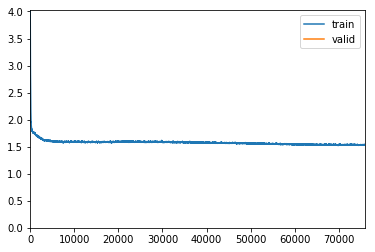

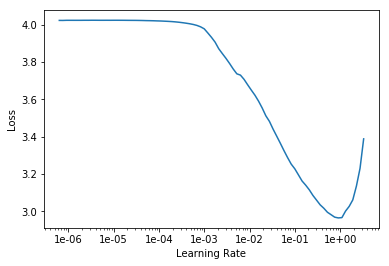

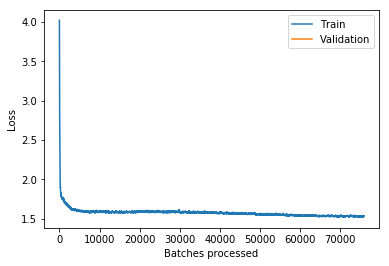

In [36]:
#learn = language_model_learner(data_lm, emb_sz=400, drop_mult=1.9, nl=1,nh = 600, callback_fns=ShowGraph)
learn = language_model_learner(data_lm,arch=AWD_LSTM,config= awd_lstm_lm_config,drop_mult=1.9, callback_fns=ShowGraph,pretrained=False)
learn.lr_find()
learn.recorder.plot()
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))
learn.recorder.plot_losses()
learn.save('fit-head')


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


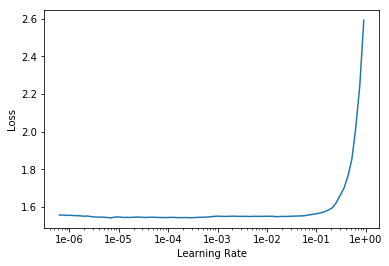

In [37]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,1.587220,1.547291,0.521494,35:18
1,1.562809,1.531657,0.522184,35:17
2,1.532670,1.506716,0.532890,35:19


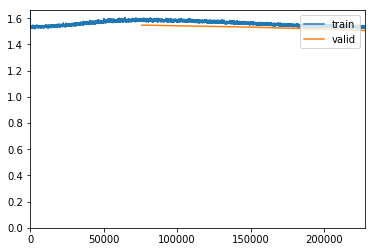

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [38]:
learn.fit_one_cycle(3, .01, moms=(0.8,0.7))

In [39]:
learn.save('fit-head')

In [40]:
learn.save_encoder('fine_tuned_enc3')

In [41]:
learn.export("language_model_learner.pkl")

In [42]:
!ls ./result

data_lm1.pkl  language_model_learner.pkl  models


In [43]:
df = walks.sample(frac=1).reset_index(drop=True)
df['index1']=df.index

g = df.groupby('component')
df['RN'] = g['index1'].rank(method='min')

df[df['component']==x_train[1]].head()


,walk,label,start_node,component,index1,RN
696,1 18 1 14 1 20 1 13 1 9 1 12 1 11 1 15 ...,2,285030,898,696,1.0
739,1 23 2 9 3 7 1 12 2 9 1 20 2 9 1 20 2 ...,2,285017,898,739,2.0
1206,1 13 1 22 1 13 1 14 1 13 2 18 1 6 1 19 ...,2,285151,898,1206,3.0
2176,1 6 1 11 1 22 1 14 1 13 1 14 1 13 1 6 ...,2,285147,898,2176,4.0
3984,2 10 1 5 1 14 1 5 1 14 1 5 2 10 1 23 1...,2,285229,898,3984,5.0


In [44]:
df.groupby('component')['walk'].apply(lambda x: ', '.join(x))

def f(x):
     return Series(dict(label = x['label'].min(), text =  ', '.join(x['walk'])))
df_text_comp = df[(df['RN']<=9.0)].groupby('component').apply(f)
df_text_comp.head()

,label,text
component,,
1,1,0 12 0 17 0 7 0 12 0 7 0 9 0 20 0 9 0 ...
2,1,0 14 0 15 0 13 0 11 0 23 0 11 0 22 0 16...
6,1,0 20 0 17 0 22 0 17 0 19 0 7 0 13 0 14 ...
7,1,0 10 0 4 0 15 0 23 0 22 0 23 0 10 0 6 ...
9,1,0 23 0 14 0 10 0 4 0 15 0 19 0 6 0 19 ...


In [45]:
df_text_comp['component']= df_text_comp.index
df_text_comp.index.names = ['comp']
df_text_comp.head()

,label,text,component
comp,,,
1,1,0 12 0 17 0 7 0 12 0 7 0 9 0 20 0 9 0 ...,1
2,1,0 14 0 15 0 13 0 11 0 23 0 11 0 22 0 16...,2
6,1,0 20 0 17 0 22 0 17 0 19 0 7 0 13 0 14 ...,6
7,1,0 10 0 4 0 15 0 23 0 22 0 23 0 10 0 6 ...,7
9,1,0 23 0 14 0 10 0 4 0 15 0 19 0 6 0 19 ...,9


In [46]:
train = pd.merge(df_text_comp, train_tmp, on='component', sort=False)
test =  pd.merge(df_text_comp, test_tmp, on='component', sort=False)
val =  pd.merge(df_text_comp, val_tmp, on='component', sort=False)
(train.shape,val.shape, test.shape, train.shape[0]/df_text_comp.shape[0])

((360, 3), (90, 3), (50, 3), 0.72)

In [47]:
bs=32#48

data_clas = TextClasDataBunch.from_df(train_df=train[['text','label']],valid_df=val[['text','label']],  path=mypath, text_cols='text',label_cols = 'label', vocab=data_lm.vocab)


In [48]:
data_clas.save('tmp_clas1')

In [49]:
data_clas = load_data(mypath, 'tmp_clas1', bs=bs)

In [50]:
data_clas.show_batch()

text,target
xxbos 3 6 1 10 1 19 1 14 3 16 1 14 3 19 3 6 1 13 1 5 1 15 1 21 3 23 1 21 3 23 1 15 1 6 1 10 1 18 3 4 1 22 1 23 1 18 1 10 1 15 3 23 1 5 1 10 3 6 3 22 3 19 1 10 3 16 1 10 1,2
xxbos 3 5 3 14 3 13 3 15 3 14 3 14 3 14 3 14 3 14 3 14 3 11 3 14 3 11 3 14 3 14 3 20 0 14 3 15 3 11 0 19 3 14 3 18 3 11 3 14 3 11 3 15 3 7 0 4 3 18 3 23 3 18 0 4 3 18 3 4 0,1
xxbos 0 17 0 5 0 13 0 4 0 13 0 23 0 6 0 19 0 23 0 20 0 11 0 13 0 15 0 10 0 7 0 15 0 10 0 15 0 7 0 17 0 7 0 17 0 17 0 4 0 14 0 17 0 19 0 17 0 5 0 19 0 5 0 17 0 17 0 17 0,1
xxbos 2 15 1 18 2 15 1 19 2 15 2 15 2 15 1 19 2 17 2 22 2 17 1 18 1 19 2 15 1 19 1 18 2 15 1 18 2 17 1 23 1 20 2 5 1 20 2 23 1 20 1 19 2 21 2 17 2 21 2 14 2 4 2 13 2 22 2 10 2,2
xxbos 0 15 0 17 0 15 0 15 0 9 0 6 0 23 0 22 0 9 0 22 0 11 0 10 0 11 0 23 0 22 0 6 0 23 0 11 0 6 0 11 0 6 0 23 0 9 0 7 0 9 0 17 0 22 0 9 0 6 0 11 0 23 0 18 0 23 0 9 0,1


In [74]:
#learn = text_classifier_learner(data_clas, emb_sz=400, drop_mult=1.9, nl=1,nh = 600)
learn = text_classifier_learner(data_clas,arch=AWD_LSTM,config = awd_lstm_clas_config, drop_mult=2.0,pretrained=False)
learn.load_encoder('fine_tuned_enc3')
learn.freeze()

In [75]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


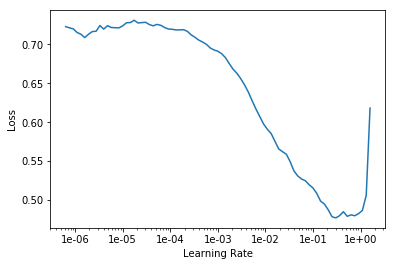

In [76]:
learn.recorder.plot()

In [77]:
learn.fit_one_cycle(1, .1, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.405923,0.651388,0.500000,00:04


In [78]:
def predict(test,learn):
  predictions=[]
  for index, row in test.iterrows():
    p=learn.predict(row['text'])
    #print((row['label'],str(p[0])))
    predictions.append((row['text'],str(row['label']),str(p[0])))
  dfpred = pd.DataFrame(predictions)
  dfpred.columns=['text','label','prediction']
  match=dfpred[(dfpred['label']==dfpred['prediction'])]
  #match.head()
  print((dfpred.shape[0], match.shape[0],match.shape[0]/dfpred.shape[0]))

In [79]:
learn.fit_one_cycle(1, .1, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.320334,0.676883,0.500000,00:04


In [80]:
learn.unfreeze()
learn.fit_one_cycle(8, slice(5e-2/(2.6**4),5e-02), moms=(0.8,0.7))


epoch,train_loss,valid_loss,accuracy,time
0,0.317873,0.464301,0.766667,00:06
1,0.284078,0.582543,0.544444,00:06
2,0.273636,0.232244,0.933333,00:06
3,0.259444,0.249032,0.922222,00:06
4,0.258786,0.290534,0.900000,00:06
5,0.253364,0.275627,0.900000,00:06
6,0.241959,0.313967,0.888889,00:06
7,0.240771,0.341844,0.844444,00:06


In [81]:
predict(test,learn)

(50, 46, 0.92)


In [82]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.232238,0.365101,0.844444,00:06
1,0.229838,0.311252,0.888889,00:06
2,0.226938,0.282698,0.888889,00:06
3,0.216813,0.264844,0.900000,00:06
4,0.218181,0.274553,0.888889,00:06
5,0.222507,0.252355,0.922222,00:06
6,0.221517,0.270890,0.911111,00:06
7,0.224835,0.280897,0.888889,00:06
8,0.221946,0.279553,0.900000,00:06
9,0.221795,0.264115,0.911111,00:06


In [83]:
predict(test,learn)

(50, 46, 0.92)


learn.save('fit-classifier')

In [84]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.199942,0.260877,0.911111,00:06
1,0.225433,0.283830,0.888889,00:06
2,0.214197,0.273421,0.888889,00:06
3,0.210364,0.257738,0.911111,00:06
4,0.207016,0.271216,0.911111,00:06
5,0.198009,0.307233,0.888889,00:06
6,0.198823,0.267993,0.911111,00:06
7,0.202443,0.330314,0.866667,00:06
8,0.196323,0.295047,0.888889,00:06
9,0.199639,0.263752,0.911111,00:06


In [85]:
predict(test,learn)

(50, 46, 0.92)


In [86]:
learn.model

SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(56, 400, padding_idx=1)
      (encoder_dp): EmbeddingDropout(
        (emb): Embedding(56, 400, padding_idx=1)
      )
      (rnns): ModuleList(
        (0): WeightDropout(
          (module): LSTM(400, 400, batch_first=True)
        )
      )
      (input_dp): RNNDropout()
      (hidden_dps): ModuleList(
        (0): RNNDropout()
      )
    )
  )
  (1): PoolingLinearClassifier(
    (layers): Sequential(
      (0): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Dropout(p=0.8)
      (2): Linear(in_features=1200, out_features=50, bias=True)
      (3): ReLU(inplace)
      (4): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): Dropout(p=0.1)
      (6): Linear(in_features=50, out_features=2, bias=True)
    )
  )
)